In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
import json

malware_json_file = "malware_summary_v20.json"
benign_json_file = "benign_summary_v20.json"
malware_json = None
benign_json = None

with open(malware_json_file, 'r') as file:
    malware_json = json.load(file)

with open(benign_json_file, 'r') as file:
    benign_json = json.load(file)


In [3]:
import numpy as np
from itertools import chain

dataset = []
for element in chain(malware_json, benign_json):
    session = element["session_chunk"]
    server_port = session["port_dst"]
    bytes_client_server = session["bytes_sent_client_server"] 
    bytes_server_client = session["bytes_sent_server_client"] 
    session_time = session["session_time"]
    session_type = 0
    addr_in_DNS = 0
    if session["class"] == "malware":
        session_type = 1
    if session["ip_addr_in_DNS"]:
        addr_in_DNS = 1
    dataset.append([server_port,bytes_client_server, bytes_server_client, session_time, addr_in_DNS, session_type])
    # dataset.append([bytes_client_server, bytes_server_client, session_time, addr_in_DNS, session_type])

dataset = np.array(dataset)


In [4]:
import pandas as pd

df = pd.DataFrame(dataset, columns=["Server_port","Bytes_client_server", "Bytes_server_client", "Session_time", "Addr_in_DNS", "Session_type"])
# df = pd.DataFrame(dataset, columns=["Bytes_client_server", "Bytes_server_client", "Session_time", "Addr_in_DNS", "Session_type"])
print(df.head)

<bound method NDFrame.head of      Server_port Bytes_client_server Bytes_server_client         Session_time  \
0           4143                6798                1946              1.58159   
1          65500               18325                2876    95.97824099999997   
2          65500               43342                1140             2.333265   
3          65500               48068                 960   2.5042319999999996   
4          65500               45608                1080   2.2744480000000005   
...          ...                 ...                 ...                  ...   
1661       44850               47795                1056   0.8451200000000001   
1662       44850               54216                 924             0.115303   
1663       44850               46686                1305  0.46664800000000006   
1664       51413                1471               42234  0.36649499999999996   
1665       51413                1758               34650   1.0009379999999997  

In [5]:
df.shape
parameters = df.iloc[:,0:5]
labels = df.iloc[:,5]

x_train, x_test, y_train,y_test = train_test_split(parameters, labels, test_size=0.2, random_state=0)

In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[169   0]
 [  1 164]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       169
           1       1.00      0.99      1.00       165

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

0.9970059880239521


[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malware')]

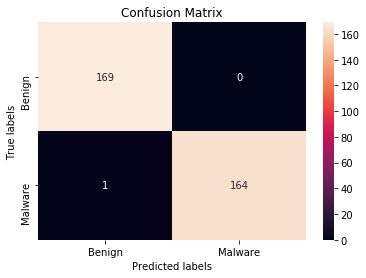

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Benign', 'Malware'])
ax.yaxis.set_ticklabels(['Benign', 'Malware'])

In [10]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

pca = PCA()
pca.fit_transform(parameters)
explained_variance = pca.explained_variance_ratio_

Text(0.5, 0, 'Główne składowe')

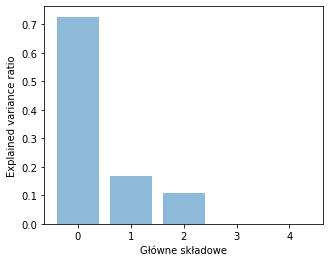

In [11]:
plt.figure(figsize=(5, 4))
plt.bar(list(range(len(explained_variance))), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Główne składowe')

(1666, 4)
SCORE: 0.8862275449101796

CONFUSION MATRIX:


[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malware')]

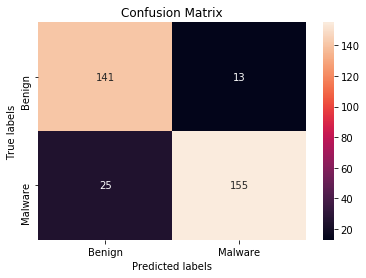

In [13]:
pca = PCA(n_components=4)
x_new = pca.fit_transform(parameters)
print(x_new.shape)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_new, labels, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(x_train_pca, y_train_pca)
y_pred_pca = gnb.predict(x_test_pca)
print(f"SCORE: {accuracy_score(y_test_pca, y_pred_pca)}")
print("\nCONFUSION MATRIX:")
cm = confusion_matrix(y_test_pca, y_pred_pca)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Benign', 'Malware'])
ax.yaxis.set_ticklabels(['Benign', 'Malware'])